In [11]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('./data/red-wine.csv')
print(red_wine.shape)
red_wine.head();


(1599, 12)


In [12]:
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1109           10.8             0.470         0.43            2.10      0.171   
1032            8.1             0.820         0.00            4.10      0.095   
1002            9.1             0.290         0.33            2.05      0.063   
487            10.2             0.645         0.36            1.80      0.053   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1109                 27.0                  66.0  0.99820  3.17       0.76   
1032                  5.0                  14.0  0.99854  3.36       0.53   
1002                 13.0                  27.0  0.99516  3.26       0.84   
487                   5.0                  14.0  0.99820  3.17       0.42   

      alcohol  quality  
1109     10.8        6  
1032      9.6        5  
1002     11.7        7  
487      10.0        6

In [13]:
print(X_train.shape)

(1119, 11)


In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [15]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [16]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 2s 104ms/step - loss: 0.2548 - val_loss: 0.1313
Epoch 2/10
5/5 [==============================] - 0s 36ms/step - loss: 0.1323 - val_loss: 0.1219
Epoch 3/10
5/5 [==============================] - 0s 35ms/step - loss: 0.1203 - val_loss: 0.1254
Epoch 4/10
5/5 [==============================] - 0s 40ms/step - loss: 0.1181 - val_loss: 0.1091
Epoch 5/10
5/5 [==============================] - 0s 34ms/step - loss: 0.1101 - val_loss: 0.1118
Epoch 6/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1075 - val_loss: 0.1040
Epoch 7/10
5/5 [==============================] - 0s 34ms/step - loss: 0.1047 - val_loss: 0.1021
Epoch 8/10
5/5 [==============================] - 0s 40ms/step - loss: 0.1038 - val_loss: 0.1031
Epoch 9/10
5/5 [==============================] - 0s 55ms/step - loss: 0.1012 - val_loss: 0.1022
Epoch 10/10
5/5 [==============================] - 0s 36ms/step - loss: 0.0995 - val_loss: 0.1003


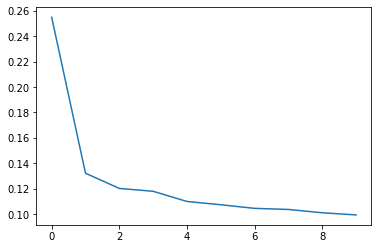

In [17]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();